In [15]:
#1. 원하는 이미지 6개를 찾으세요. (6,128,128,3)의 shape을 갖는 ndarray images_want에 이미지 데이터들을 불러오세요.
!pip install einops
from einops import rearrange, reduce, repeat
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np
%matplotlib inline

images_want=[]
images_want_wo_resize=[]
for image_name in range(1,7):
    image = Image.open('C:/Users/82104/Desktop/'+str(image_name)+'.jpg')
    x=np.asarray(image.resize((128,128),Image.LANCZOS))
    images_want.append(x)
    images_want_wo_resize.append(np.asarray(image)) 

True


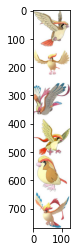

In [59]:
#2. 행을 따라(세로로 길게), 6개의 이미지를 나열시켜 보여주세요.
images_want_nd=np.asarray(images_want)
imshow(images_want_nd.reshape(-1,128,3)) # -1 알아서..?
print(np.array_equal(rearrange(images_want, 'b h w c -> (b h) w c'),images_want_nd.reshape(-1,128,3)))

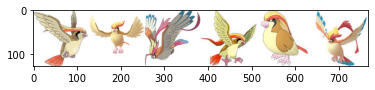

In [53]:
#3. 열을 따라(가로로 길게), 6개의 이미지를 나열시켜 보여주세요.
imshow(rearrange(images_want, 'b h w c -> h (b w) c'))
x=images_want[0]
for z in range(1,len(images_want)):
  x=np.concatenate([x,images_want[z]],axis=1)
imshow(x)

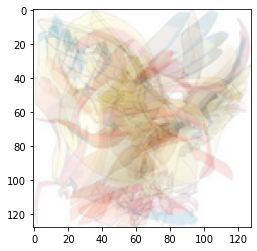

In [60]:
#4. einops의 reduce를 이용, images_want의 batch가 평균을 기준으로 제거된 images_bymean을 만들어 보여주세요.
images_bymean = reduce(images_want_nd.astype(float), 'b h w c -> h w c', 'mean')
imshow(np.around(images_bymean).astype('int'))

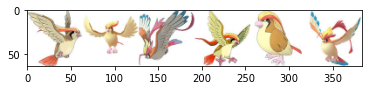

In [70]:
#5. einops의 reduce를 이용, 각각 반으로 줄어든 height, width에 대해, 열을 따라 6개의 이미지를 나열시켜 보여주세요.
image_change = reduce(images_want_nd.astype(float),'b (h h2) (w w2) c -> h (b w) c','mean', h2=2, w2=2)
imshow(np.around(image_change).astype('int'))

In [96]:
#6. einops의 rearrange를 이용, images_want의 width와 color 사이, 크기가 1인 차원을 추가시킨 image_want_addaxis를 만드세요.
image_want_addaxis = rearrange(images_want,'b h w c -> b h w 1 c').shape
image_want_addaxis

(6, 128, 128, 1, 3)

In [107]:
#6. einops의 reduce, repeat를 이용, 
#1) images_want의 height와 width 사이, 크기가 2인 차원 new_axis을 추가시킨 image_want_addaxistwo를 만드세요.
image_want_addaxistwo = repeat(images_want_nd, 'b h w c -> b h new_axis w c', new_axis=2)
#image_want_addaxistwo
#2) images_want_addaxistwo의 new_axis를, 최저값을 기준으로 제거시킨 image_want_two를 만드세요.
image_want_two = reduce(image_want_addaxistwo,'b h new_axis w c -> b h w c', 'min')
#image_want_two
#3) images_want와 images_want_two의 값이 같은지 확인하세요.
np.array_equal(images_want,image_want_two )

True

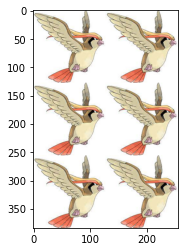

In [108]:
#7. imshow(np.tile('images_want[0]',(3,2,1)))과 같은 기능을 하는 코드를 einops의 repeat를 이용해 작성하세요.
imshow(repeat(images_want[0], 'h w c -> (3 h) (2 w) c'))

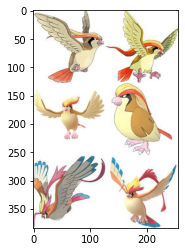

In [145]:
#8. einops의 rearrange('images_want', '(b1 b2) h w c -> (b2 h) (b1 w) c ', b1=2)과 같은 기능을 하는 코드를 np.concatenate를 이용해 작성하세요.
x = images_want[0]; y = images_want[3]

for z in range(1,3):
    x = np.concatenate([x,images_want[z]],axis=0)
for k in range(4,6):
    y = np.concatenate([y,images_want[k]],axis=0)
    
imshow(np.concatenate([x,y],axis=1))
# 뭔가 코드를 어거지로 짠 듯한..


    


In [77]:
#9. 지난 과제(09.17)에 사용한 데이터를 변수명 df에 불러와 결측값 처리 후, 시각화에 사용할 두 개의 column을 골라 해당 column들만으로 구성된 df_first의 첫 5개 항목을 보여주세요.
import pandas as pd
df=pd.read_csv('C:/Users/82104/Desktop/Latest Covid-19 India Status.csv',encoding='euc-kr')
df = df.fillna(0)
df_first = df[['Active Ratio (%)','Discharge Ratio (%)']]
df5 = df_first.head()
df5

,Active Ratio (%),Discharge Ratio (%)
0,0.17,98.13
1,0.71,98.60
2,0.76,98.74
3,0.83,98.20
4,0.01,98.66


<ipython-input-79-d94786640975>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.sort_values('Active Ratio (%)',inplace=True)


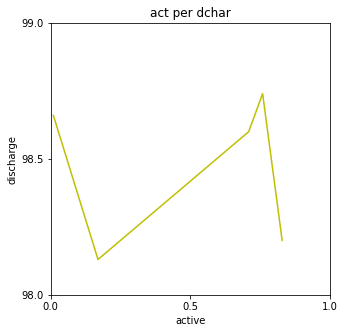

In [79]:
#10. df_first의 첫 column을 x축, 두번째 column을 y축으로 하는 노랑색 꺾은선 그래프를 그려주세요. (xtick, ytick, xlabel, ylabel, title 등을 설정하세요.)
import matplotlib.pyplot as plt
import numpy as np
df5.sort_values('Active Ratio (%)',inplace=True)
plt.figure(figsize=(5,5))
plt.plot(df5['Active Ratio (%)'],df5['Discharge Ratio (%)'],'y')
plt.title('act per dchar')
plt.xlabel('active')
plt.ylabel('discharge')
plt.xticks([0,0.5,1.0])
plt.yticks([98.0,98.5,99.0])
plt.xlim(0,1)
plt.ylim(98,99)
plt.show()




In [257]:
#11. 타이타닉 데이터를 변수명 df_titanic에 불러와 결측값 처리 후, 10년 단위(0이상 10미만, 10이상 20미만..)로 나이대가 적혀있는 새로운 column 'age_two'를 만드세요. 
#ex) 나이가 13세인 승객인 경우 age_two의 값은 10, 나이가 55세인 승객의 경우 age_two의 값은 50 
import pandas as pd
import numpy as np
import math
df_titanic = pd.read_csv('C:/Users/82104/Desktop/0924-main/titanic_train.csv')
df_titanic['Age'] = df_titanic['Age'].fillna(df_titanic['Age'].mean())
df_titanic['Cabin'] = df_titanic['Cabin'].fillna('none')
df_titanic['age_two']=df_titanic['Age']//10*10
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_two
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,none,S,20.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,30.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,none,S,20.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,30.0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,none,S,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,none,S,20.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,10.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,none,S,20.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,20.0


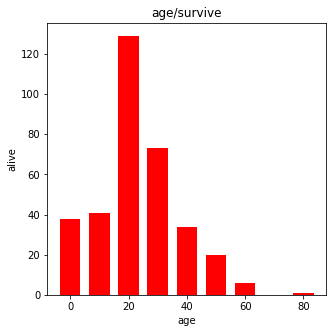

In [261]:
#12. 나이대 별 생존자 수를 파악할 수 있도록 그래프를 그려주세요.
import matplotlib.pyplot as plt

age_survived = df_titanic.groupby(['Survived','age_two']).count().loc[1]

plt.figure(figsize=(5,5))
plt.bar(age_survived.index,age_survived['PassengerId'], width=7, color='r')
plt.title('age/survive')
plt.xlabel('age')
plt.ylabel('alive')

plt.show()

In [ ]:
#13. df_titanic와 df를 이용해 2개의 그래프를 추가적으로 그린 뒤, 두 그래프가 (0,0), (1,1)에 위치하도록 하는 subplot을 만드세요. 해당 subplot의 (0,1), (1,0)은 빈칸이 되도록 axis를 off로 설정해주세요.

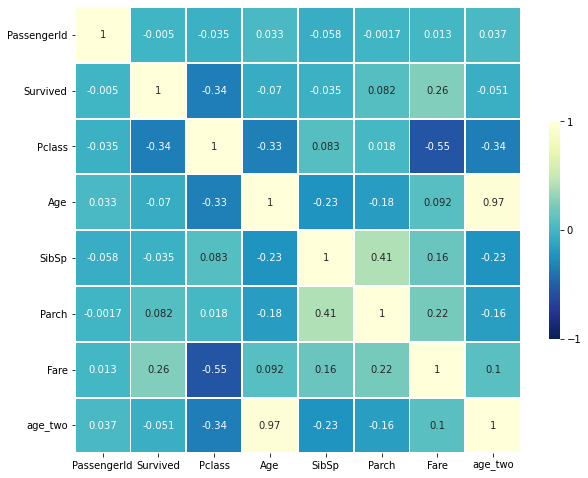

In [186]:
#14. df, df_titanic 또는 새로운 데이터를 가져온 후, column 간 상관계수를 heatmap을 이용해 보여주세요.
import seaborn as sns
corr = df_titanic.corr()
f, ax = plt.subplots(figsize=(10,10))
heatmap = sns.heatmap(corr,
                      square = True,
                      linewidths = 1.,
                      cmap = 'YlGnBu_r',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, 0 ,1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 10}
                     )
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [ ]:
#15. 상관계수를 해석할 때 주의할 점이 있다면 적어주세요.
# 1. 높은 상관관계를 띈다고 해서 인과관계로 치부해서는 안된다
# 2. 아웃라이어의 존재가능성을 항상 유의해야 한다(상관관계가 변할 수 있음)
# 3. 제 3변인을 인하여 상관계수가 존재하게 될 수도 그 반대 일수도